In [22]:
import numpy as np
from sklearn import datasets
from matplotlib.pyplot import scatter as sct
import matplotlib.pyplot as plt

In [37]:
def init_rand_centroids(K, x):
    m, n = np.shape(x)
    centroids = np.empty((K, n))
    for i in range(K):
        centroids[i] =  x[np.random.choice(range(m))] 
    return centroids

def euclidean_distance(x1, x2):
    return np.linalg.norm(x1 - x2)

def closest_centroid(x, centroids, K):
    distances = np.empty(K)
    for i in range(K):
        distances[i] = euclidean_distance(centroids[i], x)
    return np.argmin(distances)

def make_clusters(centroids, K, x):
    m, _ = np.shape(x)
    cluster_idx = np.empty(m)
    for i in range(m):
        cluster_idx[i] = closest_centroid(x[i], centroids, K)
    return cluster_idx

def compute_means(cluster_idx, K, x):
    _, n = np.shape(x)
    centroids = np.empty((K, n))
    for i in range(K):
        points = x[cluster_idx == i]
        centroids[i] = np.mean(points, axis=0)
    return centroids

def run_Kmeans(K, x, max_iterations=10000):
    centroids = init_rand_centroids(K, x)
    print(f"initial centroids: {centroids}")
    for _ in range(max_iterations):
        clusters = make_clusters(centroids, K, x)
        previous_centroids = centroids                                                                                                                                                                                                                                                                                                                                                                                                                                                                              
        centroids = compute_means(clusters, K, x)
        diff = previous_centroids - centroids
        if not diff.any():
            return clusters
    return clusters

initial centroids: [[ 0.87847294  6.55797264]
 [-5.10631531 -3.68007864]
 [-3.63152384 -3.63562225]]


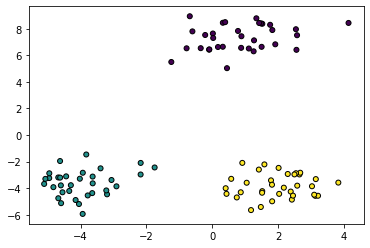

In [50]:
X, y = datasets.make_blobs(centers=3)
y_preds = run_Kmeans(3, X)
sct(X[:,0], X[:,1], marker = 'o', c = y_preds, s = 25, edgecolor = 'k')

initial centroids: [[  7.66421849 -10.29755392]
 [  2.48132145  -7.79555198]
 [ -6.20525836  -4.65448458]
 [  6.90055697  -8.15891278]]


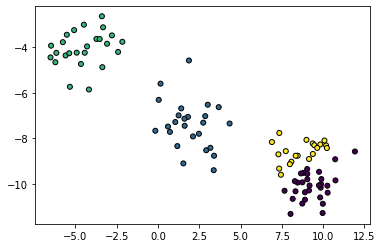

In [51]:
X, y = datasets.make_blobs(centers=4)
y_preds = run_Kmeans(4, X)
sct(X[:,0], X[:,1], marker = 'o', c = y_preds, s = 25, edgecolor = 'k')

initial centroids: [[ 9.78393919 -1.5538937 ]
 [-4.50642531  6.47659967]
 [ 8.1541552   4.45038018]
 [-2.44120847  6.84372296]
 [ 3.28817794 -5.72528316]]


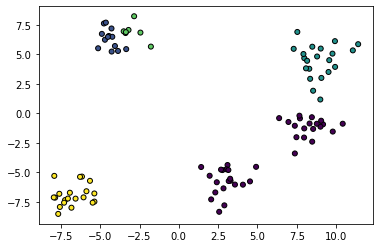

In [52]:
X, y = datasets.make_blobs(centers=5)
y_preds = run_Kmeans(5, X)
sct(X[:,0], X[:,1], marker = 'o', c = y_preds, s = 25, edgecolor = 'k')

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

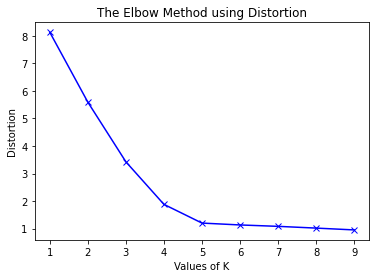

In [55]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist


distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [54]:
#When K means fail:
#1: large deviations in cluster size and density of datapoint
#2. Large no. of outliers
#3. Large no. of dimensions